In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os


class DataOperations:
    """
    This is a general class to do operations on a pandas.DataFrame.
    As input, you can give numpy.ndarray, pandas.DataFrame, csv file or json file.
    If you don't enter any input, randomly a dataset is generated.
    Please don't try to enter any other data type or different file type as an input
    because I didn't write code to throw an error for this scenario.
    """
    
    num_features = 2
    num_samples = 100
    num_classes = 2
    rand_min = 0
    rand_max = 100
    
    def __init__(self, data=None):
        self.data = self.read_data(data)
        self.data.columns = self.get_cols()
        #print(self.data)
        
    def __str__(self):
        return str(self.data)
    
    def __repr__(self):
        return str(self.data)
    
    @classmethod
    def read_data(cls, data):
        return getattr(cls, "from_"+type(data).__name__)(data)
    
    @classmethod
    def from_ndarray(cls, data):
        return pd.DataFrame(data)
    
    @classmethod
    def from_str(cls, data):
        if not (os.path.exists(data) or (os.path.splitext(data)[1] in [".csv", ".json"])):
            raise ValueError("Please enter a valid input")
        try:
            df = pd.read_csv(data) if ".csv" in data else pd.read_json(data)
        except:
            raise ValueError("Please enter a valid input")
        return df
        
    @classmethod
    def from_DataFrame(cls, data):
        return data
    
    @classmethod
    def from_NoneType(cls, data):
        data = np.append(np.random.randint(cls.rand_min, cls.rand_max, (cls.num_samples, cls.num_samples)),
                         np.random.randint(0, cls.num_classes, (cls.num_samples, 1)), axis=1)
        return pd.DataFrame(data)
    
    # automatic label name generator 
    def get_cols(self):
        return ["feat_"+str(i) for i in range(self.data.shape[1]-1)] + ["label"]
    
    def std(self):
        """
        Returns the standard deviation of each feature.
        
        Parameters
        ----------
        data : DataFrame
            DataFrame to print information about.
            
        Returns
        -------
        None   
        """
        return self.data.std()
    
    def info(self):
        """This method prints information about a DataFrame
        including the index dtype and columns, non-null values and memory usage.
        
        
        Parameters
        ----------
        data : DataFrame
            DataFrame to print information about.
            
        Returns
        -------
        None
        """
        return self.data.info()
    
    def scatter(self, feat1=None, feat2=None):
        """
        Given (x, y) pair it plots them on the axis as a dot.
        
        Parameters
        ----------
        feat1: string, optional
               The feature name for x-axis. If you don't specify, it uses first
               feature as feat1.
        feat2: string, optional
               The feature name for x-axis. If you don't specify, it uses first
               feature as feat1.
               
        Returns
        -------
        None
        
        Examples
        --------
        >>> df_from_json = DataOperations("./test_data/patients.json")
        >>> df_from_json.scatter()
        """
        if feat1 is None or feat2 is None:
            feat1 = self.data.columns[0]
            feat2 = self.data.columns[1]
        sns.scatterplot(data=self.data, x=feat1, y=feat2, hue="label")
    
    def hist(self, feat=None):
        """
        Given a feature name it plots histogram of the values.
        
        Parameters
        ----------
        feat: string, optional
               Name of the feature to plot. If you don't specify, it uses first
               feature as feat1.
               
        Returns
        -------
        None
        
        Examples
        --------
        >>> df_from_json = DataOperations("./test_data/patients.json")
        >>> df_from_json.hist("feat_3")
        """
        sns.histplot(data=self.data, x="feat_0") if feat is None else sns.histplot(data=self.data, x=feat)
    
    def pairplot(self):
        """
        It plots all the possible pair of features' scatter plots.
        It plots the distribution of the data for the (x, x) pair.
        It runs slow hence don't use thhis for a large dataset.
        
        Parameters
        ----------
        data : DataFrame
            DataFrame to plot.
               
        Returns
        -------
        None
        
        Examples
        --------
        >>> df_from_json = DataOperations("./test_data/patients.json")
        >>> df_from_json.pairplot()
        """
        sns.pairplot(data=self.data, hue="label")
        
    def num_samples(self):
        """Returns number of samples/rows"""
        return self.data.shape[0]
    
    def num_feats(self):
        """Returns number of features"""
        return self.data.shape[1] - 1 # used -1 for the label column
    
    @classmethod
    def normalize_data(cls, self):
        """
        Normalize numeric features with its labels.
        The operation is (x - X_mean)/X_std
        x: sample
        X_mean: mean of the feature
        X_std: standard deviation of the feature
        
        Parameters
        ----------
        data : DataOperations

        Returns
        -------
        DataOperations
        
        """
        x = self.data.iloc[:, :-1]
        y = self.data.iloc[:, -1]
        numeric_data = x.select_dtypes(np.number)
        std, mean = np.std(numeric_data), np.mean(numeric_data)
        return cls(np.hstack(((numeric_data - mean)/std, np.array(y).reshape(-1, 1))))

In [2]:
pd.set_option("display.max_rows", 10)

In [3]:
arr = np.random.randint(0, 5, (50, 5))
df_from_np = DataOperations(arr)
df_from_np

    feat_0  feat_1  feat_2  feat_3  label
0        3       3       3       2      1
1        2       1       3       0      0
2        2       4       1       2      0
3        0       0       1       4      2
4        3       0       0       4      3
..     ...     ...     ...     ...    ...
45       3       1       2       3      0
46       1       4       2       3      1
47       4       4       0       3      3
48       2       0       1       2      0
49       3       4       1       3      2

[50 rows x 5 columns]

In [4]:
df_from_np.num_samples()

50

In [5]:
df_from_np.num_feats()

4

In [6]:
norm_data = DataOperations.normalize_data(df_from_np)
print(type(norm_data))
norm_data

<class '__main__.DataOperations'>


      feat_0    feat_1    feat_2    feat_3  label
0   0.914991  0.750748  0.605406  0.086031    1.0
1   0.152499 -0.589874  0.605406 -1.347817    0.0
2   0.152499  1.421060 -0.739940  0.086031    0.0
3  -1.372487 -1.260185 -0.739940  1.519879    2.0
4   0.914991 -1.260185 -1.412613  1.519879    3.0
..       ...       ...       ...       ...    ...
45  0.914991 -0.589874 -0.067267  0.802955    0.0
46 -0.609994  1.421060 -0.067267  0.802955    1.0
47  1.677484  1.421060 -1.412613  0.802955    3.0
48  0.152499 -1.260185 -0.739940  0.086031    0.0
49  0.914991  1.421060 -0.739940  0.802955    2.0

[50 rows x 5 columns]

In [7]:
df_from_np.std()

feat_0    1.324803
feat_1    1.506991
feat_2    1.501700
feat_3    1.409009
label     1.418392
dtype: float64

In [8]:
df_from_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   feat_0  50 non-null     int64
 1   feat_1  50 non-null     int64
 2   feat_2  50 non-null     int64
 3   feat_3  50 non-null     int64
 4   label   50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


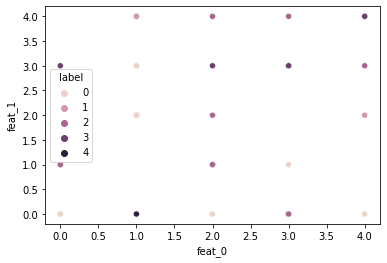

In [9]:
df_from_np.scatter()

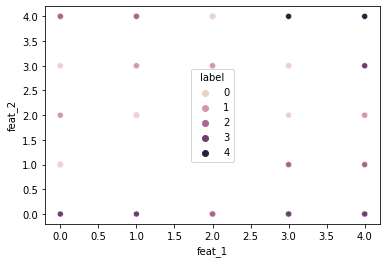

In [10]:
df_from_np.scatter("feat_1", "feat_2")

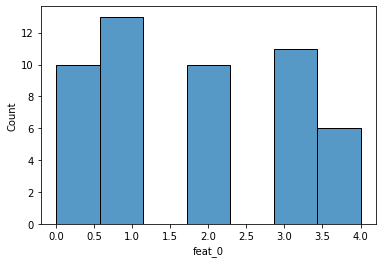

In [11]:
df_from_np.hist()

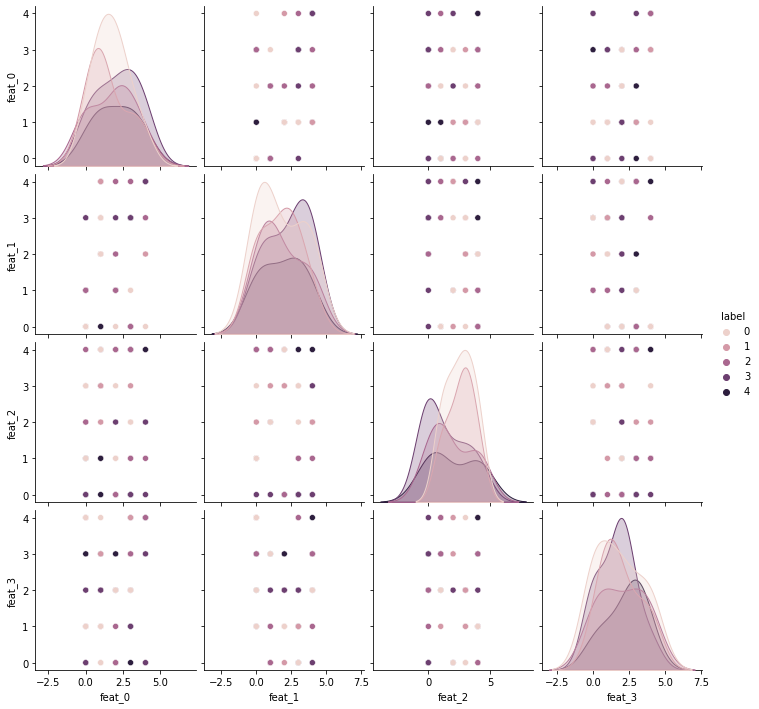

In [12]:
df_from_np.pairplot()

In [13]:
df_from_df = DataOperations(pd.DataFrame(arr))
df_from_df

    feat_0  feat_1  feat_2  feat_3  label
0        3       3       3       2      1
1        2       1       3       0      0
2        2       4       1       2      0
3        0       0       1       4      2
4        3       0       0       4      3
..     ...     ...     ...     ...    ...
45       3       1       2       3      0
46       1       4       2       3      1
47       4       4       0       3      3
48       2       0       1       2      0
49       3       4       1       3      2

[50 rows x 5 columns]

In [14]:
df_from_json = DataOperations("./test_data/patients.json")
df_from_json

   feat_0  feat_1  feat_2  label
0    John    Male      UK     10
1    Nick    Male  French     25
2     Ali  Female     USA     35
3  Joseph    Male  Brazil     29

In [15]:
df_from_csv = DataOperations("./test_data/patients.csv")
df_from_csv

   feat_0  feat_1  feat_2  label
0    John    Male      UK     10
1    Nick    Male  French     25
2     Ali  Female     USA     35
3  Joseph    Male  Brazil     29